# Задание 4

### Выделить и посчитать номера машин
### Бонусные баллы за их распознавание (при условии решения всех задач из проекта)

In [2]:
import cv2
import numpy as np
import imutils 
import easyocr
from matplotlib import pyplot as plt

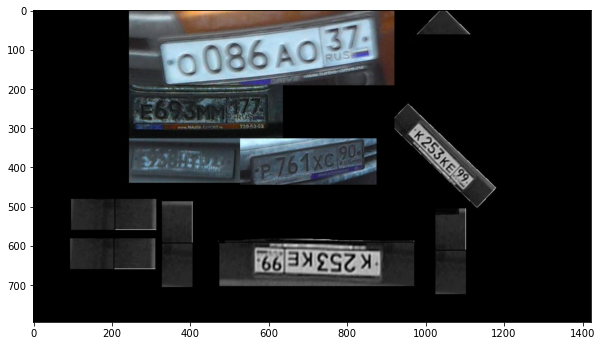

In [15]:
img = cv2.imread("1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[-9.726326251866238, 16.044124734696844], [21.418558247871964, -13.985382944569073], [134.72632625186623, 109.95587526530315], [102.58144175212804, 140.98538294456907]], '8', 0.06727002921951808)]


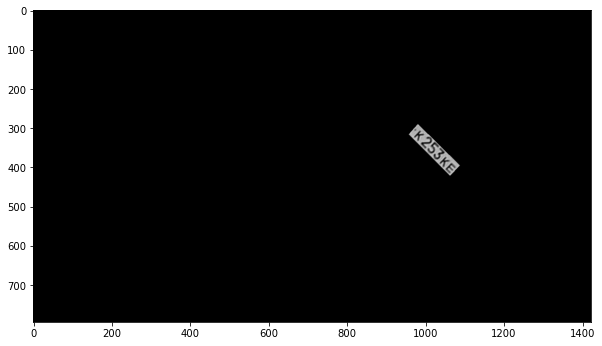

In [17]:
img_filter = cv2.bilateralFilter(gray, 30, 40, 50)
edges = cv2.Canny(img_filter, 0, 200)

cont = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
cont = sorted(cont, key=cv2.contourArea, reverse=True)[:8]
       
cont = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
cont = sorted(cont, key=cv2.contourArea, reverse=True)[:8]

pos = None
for c in cont:
    approx = cv2.approxPolyDP(c, 10, True)
    if len(approx) == 4:
        pos = approx
        break
        
mask = np.zeros(gray.shape, np.uint8)
new_img =cv2.drawContours(mask, [pos], 0, 255, -1)
bitwise_img = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(bitwise_img, cv2.COLOR_BGR2RGB))

(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop = gray[x1:x2, y1:y2]

text = easyocr.Reader(['ru'])
text = text.readtext(crop)
print(text)

In [46]:
cont = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
cont = sorted(cont, key=cv2.contourArea, reverse=True)[:8]

In [47]:
pos = None
for c in cont:
    approx = cv2.approxPolyDP(c, 10, True)
    if len(approx) == 4:
        pos = approx
        break

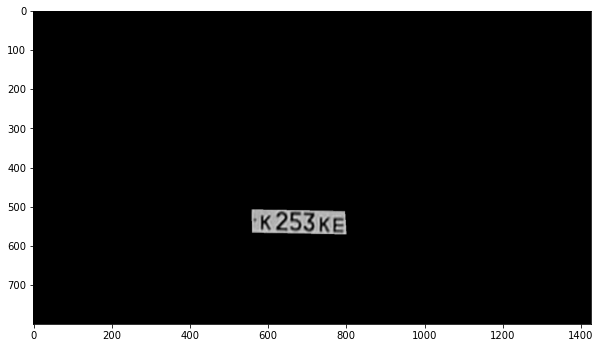

In [48]:
mask = np.zeros(gray.shape, np.uint8)
new_img =cv2.drawContours(mask, [pos], 0, 255, -1)
bitwise_img = cv2.bitwise_and(img, img, mask=mask)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(bitwise_img, cv2.COLOR_BGR2RGB))

In [20]:
(x, y) = np.where(mask == 255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
crop = gray[x1:x2, y1:y2]

text = easyocr.Reader(['ru'])
text = text.readtext(crop)
print(text)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[10, 0], [242, 0], [242, 62], [10, 62]], 'к253кЕ', 0.31427280799212065)]
